# Attrition Analysis for an Orginization

# Project Milestore 2

In [1]:
#Drop any features that are not useful for your model building and explain why they are not useful.
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [2]:
print(df['StandardHours'].min(), df['StandardHours'].max())

80 80


In [3]:
print(df['EmployeeCount'].min(), df['EmployeeCount'].max())

1 1


#among the attributes StandardHours and EmployeeCount have all the values same, so this will not have importance much for identifing the attritions, so I am dropping this attribute


In [4]:
df = df.drop(["StandardHours","EmployeeCount"], axis=1)

In [5]:
#Perform any data extraction/selection steps.

In [6]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


In [7]:
#data selection 
numeric_col = df.select_dtypes(include='number').columns.tolist()
numeric_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [8]:
category_col = df.select_dtypes(include='object').columns.tolist()
category_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [9]:
df = df.filter(numeric_col+['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'MaritalStatus'])

In [10]:
df.dtypes

Age                          int64
DailyRate                    int64
DistanceFromHome             int64
Education                    int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Attrition                   object
BusinessTravel              object
Department                  object
EducationField              object
Gender              

In [11]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,MaritalStatus
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,Yes,Travel_Rarely,Sales,Life Sciences,Female,Single
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,No,Travel_Frequently,Research & Development,Life Sciences,Male,Married
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,Yes,Travel_Rarely,Research & Development,Other,Male,Single
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,No,Travel_Frequently,Research & Development,Life Sciences,Female,Married
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,No,Travel_Rarely,Research & Development,Medical,Male,Married


In [12]:
#Transform features if necessary.
cat = [ 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'MaritalStatus']
pd.crosstab(df.Department, df.Attrition)


Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


In [13]:
def department(row):
    if row == 'Human Resources':
        return 'HR' 
    if row == 'Research & Development':
        return 'R&D'
    if row == 'Sales':
        return 'Sales'
df["Department"] = df["Department"].apply(department)
df[["Department"]].value_counts()

Department
R&D           961
Sales         446
HR             63
dtype: int64

In [14]:
pd.crosstab(df.EducationField, df.Attrition)

Attrition,No,Yes
EducationField,,
Human Resources,20,7
Life Sciences,517,89
Marketing,124,35
Medical,401,63
Other,71,11
Technical Degree,100,32


In [15]:
# lets transfor the Eductional field
def education(row):
    if row == 'Human Resources':
        return 'HR' 
    if row == 'Life Sciences':
        return 'LS'
    if row == 'Technical Degree':
        return 'Technical'
    else:
        return row
df["EducationField"] = df["EducationField"].apply(education)
df[["EducationField"]].value_counts()

EducationField
LS                606
Medical           464
Marketing         159
Technical         132
Other              82
HR                 27
dtype: int64

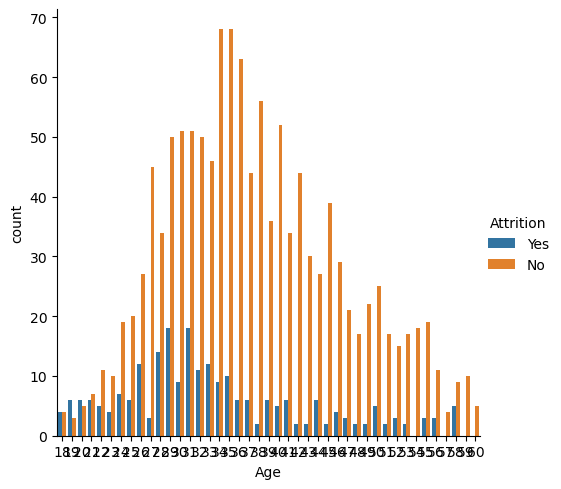

In [16]:
#Engineer new useful features.
import seaborn as sns
sns.catplot(x='Age',hue='Attrition',data=df,kind="count")

In [17]:
bins= [0,2,4,13,20,60,100]
labels = ['Infant','Toddler','Kid','Teen','Adult','Old']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,MaritalStatus,AgeGroup
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,Yes,Travel_Rarely,Sales,LS,Female,Single,Adult
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,No,Travel_Frequently,R&D,LS,Male,Married,Adult
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,Yes,Travel_Rarely,R&D,Other,Male,Single,Adult
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,No,Travel_Frequently,R&D,LS,Female,Married,Adult
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,No,Travel_Rarely,R&D,Medical,Male,Married,Adult


Create a new column age category using the age field, so lets drop the age column

In [18]:
df=df.drop('Age',axis=1)

In [19]:
#Deal with missing data (do not just drop rows or columns without justifying this)
#lets find the missing percentage for each of the attributes
df.isnull().sum() / df.shape[0] * 100.00


DailyRate                   0.0
DistanceFromHome            0.0
Education                   0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobSatisfaction             0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInCurrentRole          0.0
YearsSinceLastPromotion     0.0
YearsWithCurrManager        0.0
Attrition                   0.0
BusinessTravel              0.0
Department                  0.0
EducationField              0.0
Gender                      0.0
MaritalStatus               0.0
AgeGroup                    0.0
dtype: float64

In [20]:
df.dtypes

DailyRate                      int64
DistanceFromHome               int64
Education                      int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobSatisfaction                int64
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance                int64
YearsAtCompany                 int64
YearsInCurrentRole             int64
YearsSinceLastPromotion        int64
YearsWithCurrManager           int64
Attrition                     object
BusinessTravel                object
Department                    object
EducationField                object
G

In [21]:
#Create dummy variables if necessary.
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department','EducationField','Gender','MaritalStatus','AgeGroup'])

In [22]:
df.dtypes

DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
YearsWithCurrManager                 int64
Attrition  

In [23]:
pwd

'C:\\Bellevue University MSDS\\DSC_550_Data_Mining\\Project\\Term Project Milestone 3'

In [24]:
#Lets save the data for future purpose
df.to_csv('C:\\Bellevue University MSDS\\DSC_550_Data_Mining\\Project\\Term Project Milestone 2\employee_attrition_pm2.csv') 

# Project Milestore 3

In [25]:
df = pd.read_csv('employee_attrition_pm2.csv')
df.head()

,Unnamed: 0,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_HR,Department_R&D,Department_Sales,EducationField_HR,EducationField_LS,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,AgeGroup_Infant,AgeGroup_Toddler,AgeGroup_Kid,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Old
0,0,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,Yes,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,1,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,No,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
2,2,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,Yes,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
3,3,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,No,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,4,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,No,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0


In [26]:
df.dtypes

Unnamed: 0                           int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
YearsWithCu

In [27]:
#lets apply the level encoding for the dependent variable
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Attrition_le'] = le.fit_transform(df['Attrition'])
df.sample(5)

,Unnamed: 0,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_HR,Department_R&D,Department_Sales,EducationField_HR,EducationField_LS,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,AgeGroup_Infant,AgeGroup_Toddler,AgeGroup_Kid,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Old,Attrition_le
346,346,483,6,3,466,4,95,2,2,2,6032,10110,6,15,3,4,0,8,3,3,5,4,1,2,No,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
969,969,855,4,3,1363,4,54,3,3,4,7898,18706,1,11,3,3,0,11,2,3,10,9,0,8,No,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
210,210,1045,4,4,291,4,32,1,3,4,10400,25812,1,11,3,3,0,14,2,2,14,8,9,8,Yes,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1
786,786,1277,8,5,1094,1,87,1,1,3,4621,5869,1,19,3,4,3,3,4,3,3,2,1,2,No,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
1399,1399,574,11,3,1971,1,30,3,3,3,7510,16873,1,17,3,2,1,10,1,3,10,9,0,9,No,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0


In [28]:
#Looking at the sample we can say that Yes is converted to 1 and No as 0, also lets drop unnecerry columns like Unnamed: 0 and Attrition
df = df.drop(['Unnamed: 0','Attrition'], axis=1)

In [29]:
df = df.rename(columns={'Attrition_le': 'Attrition'})
df.head()

,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_HR,Department_R&D,Department_Sales,EducationField_HR,EducationField_LS,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,AgeGroup_Infant,AgeGroup_Toddler,AgeGroup_Kid,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Old,Attrition
0,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1
3,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0


In [30]:
print("Train data missing values: \n",df.isna().sum())

Train data missing values: 
 DailyRate                           0
DistanceFromHome                    0
Education                           0
EmployeeNumber                      0
EnvironmentSatisfaction             0
HourlyRate                          0
JobInvolvement                      0
JobLevel                            0
JobSatisfaction                     0
MonthlyIncome                       0
MonthlyRate                         0
NumCompaniesWorked                  0
PercentSalaryHike                   0
PerformanceRating                   0
RelationshipSatisfaction            0
StockOptionLevel                    0
TotalWorkingYears                   0
TrainingTimesLastYear               0
WorkLifeBalance                     0
YearsAtCompany                      0
YearsInCurrentRole                  0
YearsSinceLastPromotion             0
YearsWithCurrManager                0
BusinessTravel_Non-Travel           0
BusinessTravel_Travel_Frequently    0
BusinessTravel_Travel

In [31]:
#Lets create the labels from the Attrition field
labels = df.pop('Attrition')
labels.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [32]:
#Now I am spliting the data into 75/25 ratio to create train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.25)

In [33]:
X_train.head()

,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_HR,Department_R&D,Department_Sales,EducationField_HR,EducationField_LS,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,AgeGroup_Infant,AgeGroup_Toddler,AgeGroup_Kid,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Old
290,636,10,4,396,3,35,3,5,1,18665,25594,9,11,3,4,0,22,4,3,3,2,1,2,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
16,334,5,2,21,1,80,4,1,2,3298,15053,0,12,3,4,2,7,5,2,6,2,0,5,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1172,469,10,3,1650,3,42,2,2,3,5869,23413,9,11,3,3,0,8,2,3,5,2,1,4,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
8,216,23,3,12,4,44,2,3,3,9526,8787,0,21,4,2,0,10,2,3,9,7,1,8,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
977,999,26,1,1374,1,92,2,1,3,2029,15891,1,20,4,3,3,5,2,3,5,4,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0


In [34]:
y_train.head()

290     0
16      0
1172    0
8       0
977     0
Name: Attrition, dtype: int32

Lets fit the model with default parameters

In [35]:
#pip install xgboost

In [36]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

model = xgb.XGBClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score:", r2_score(y_test,y_predict, multioutput='variance_weighted'))


R2 score: -0.1303823158356645


In [37]:
hyperparameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }

In [38]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train,y_train)

random_cv.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [40]:
classifier = xgb.XGBClassifier(enable_categorical=False, learning_rate=0.1, 
                             max_depth=3, min_child_weight=10, n_estimators=100)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print("R2 score:", r2_score(y_test,y_pred, multioutput='variance_weighted'))


R2 score: -0.09001151884153356


I have defined the grid for hyperparameter for search and Set up the random search with 5-fold cross validation, after getting the best model from Randomized Search, I have fit the model to calculate the R-Square again, it clearly shows that the R-Square has increased a lot compared to the previous one.

In [41]:
from sklearn.metrics import precision_score, accuracy_score

accuracy_score(y_test, y_pred), precision_score(y_test, y_pred)

(0.8532608695652174, 0.6923076923076923)

The best model came out of the random search shows accuracy of 0.85

In [43]:
#Get the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[305   4]
 [ 50   9]]


<AxesSubplot:>

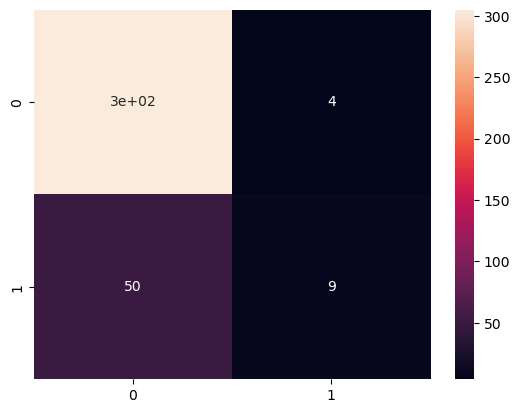

In [48]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline
sns.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

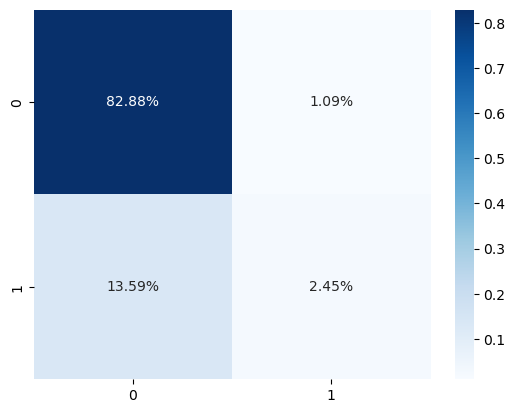

In [49]:
import numpy as np
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

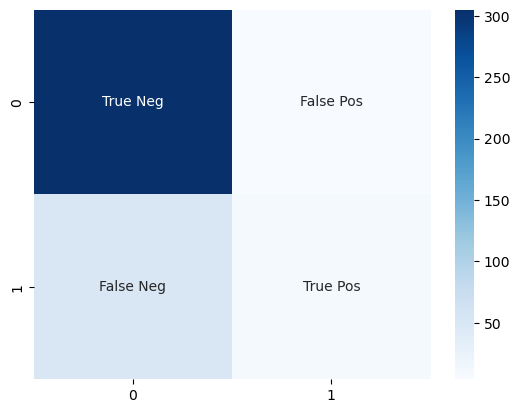

In [52]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')